VERİ BİLİMİ: İSTATİSTİK, MATEMATİK, ÖRÜNTÜ TANIMLAMA, VERİ MADENCİLİĞİ, MAKİNE ÖĞRENMESİ, YAPAY ZEKA, SİNİR AĞLARI, VERİ GÖRSELLEŞTİRME, VERİ MODELLEME, BÜYÜK VERİ VE KEŞİFSEL VERİ ANALİZİDİR

VERİ BİLİMİ TEMELLERİ İÇİN NE YAPILMALI ? 

1. PYTHON VEYA R 
2. TEMEL MATEMATİK VE İSTATİSTİK
3. VERİ BİRLEŞTİRME, ANLAMDIRMA, DAĞINIK VE ZOR VERİLERLE ÇALIŞMAYI KAVRAMA
4. VERİ GÖRSELLEŞTİRME TEKNİKLERİNE HAKİM OLMAK
5. İLERİ SEVİYE VERİ BİLİMİ İÇİN ML ALGORİTMALARIN ARKASINDA YATAN MATEMATİĞİ KAVRAMAK
6. DERİN ÖĞRENME YÖNTEMLERİ VERİ BİLİMİNDE İLERİ SEVİYE TEKNİKLER

VERİ BİLİMİNDE TEMEL KÜTÜPHANELER
PANDAS - NUMPY - MATPLOT - SCIPY - SKLEARN - KERAS

VERİ BİLİMİ/VERİ ANALİTİĞİ

1. VERİ MADENCİLİĞİ (Biçimlendirilmiş ve belirli bir boyuta indirgenmiş veri)
2. BÜYÜK VERİ ANALİTİĞİ (Biçimlendirilmemiş; Çok miktarda ve hızlı şekilde akan veri)

# 1. Problem Description and Objective

Veri seti Atina 1896'dan Rio 2016'ya kadar olan 120 yıllık tüm olimpiyat müsabakalarının katılımıcılarının özellikleri betimlemektedir. Bu bağlamda;

Kış ve Yaz Oyunlarının 1992'ye kadar aynı yılda yapıldığını unutmayın. Bundan sonra, Kış Oyunları 1994'ten başlayarak dört yıllık bir döngüde, ardından 1996'da Yaz, ardından 1998'de Kış vb bir periyod ile yapıldığını belirtmek gerekir.

Kaç sporcu, spor ve ulus var? Çoğu sporcu nereden geliyor? Kim madalya kazanır? Sporcuların özellikleri nelerdir (örn. cinsiyet ve fiziksel beden)?

Yine ilginç veriler var mesela Nazi Almanya'sının ev sahipliği yaptığı durumda rakiplerinin üstüne çıktığını veya bir dönem şiir ve resimin de olimpiyat yarışlarında mevcut olduğuna dikkat çekmek istemektedir.

# İçerikler
athlete_events.csv dosyasında;

271116 satır -> Her satır bir yarışmacıyı belirtmektedir.

15 Sütun bulunur.

1. ID - Unique number for each athlete
2. Name - Athlete's name 
3. Sex - M or F
4. Age - Integer
5. Height - In centimeters
6. Weight - In kilograms
7. Team - Team name
8. NOC - National Olympic Committee 3-letter code
9. Games - Year and season
10. Year - Integer
11. Season - Summer or Winter
12. City - Host city
13. Sport - Sport
14. Event - Event
15. Medal - Gold, Silver, Bronze, or NA

# 2. Kütüphanelerin eklenmesi 



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

#Python'da uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [2]:
veri = pd.read_csv('athlete_events.csv')
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
veri.shape #Veri seti 271116 adet sütun ve 15 ayrı öznitelikten meydana gelmektedir

(271116, 15)

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
# kategorik kolonlar (object)
cat_cols = veri.select_dtypes(include='object').columns
numeric_cols = veri.select_dtypes(include=['int64', 'float64']).columns
print("NUMERIC: ", list(numeric_cols))
print("CATEGORIC: ", cat_cols)

NUMERIC:  ['ID', 'Age', 'Height', 'Weight', 'Year']
CATEGORIC:  Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')


# 3. Verinin Temizlenmesi

* Sütun isimlerinin düzenlenmesi
* Yararsız verinin çıkarılması ve düzenlenmesi
* Kayıp veri sorunu


In [6]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

# 3.1. Sütun isimlerini değiştirelim


In [7]:
veri.rename(columns={"ID":"id",
                     "Name": "isim",
                     "Sex":"cinsiyet",
                     "Age": "yas",
                     "Height": "boy",
                     "Weight": "kilo",
                     "Team":"takim",
                     "NOC": "uok",
                     "Games":"oyunlar",
                     "Year": "yil",
                     "Season": "sezon",
                     "City": "sehir",
                     "Sport": "spor",
                     "Event":"etkinlik",
                     "Medal": "madalya"}, inplace = True)
#mevcut sütunun üzerine yaz--- inplace = True
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


#  3.2. Yararsız Verinin Çıkarılması
1. id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarlacaktır.
2. Oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilir ve çıkarılabilir.

In [8]:
#drop fonksiyonu ile id ve oyunlar sütununu çıkaralım
veri = veri.drop(["id","oyunlar"],axis = 1) #axis = 1 sütun manasında
veri.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


# 3.3. Kayıp Veri Sorunu

1. NaN (not a number)
2. Kayıp veri ile mücadele etmek için;
     
     Kayıp veriye ait örnekler veriden çıkarılabilir.
     
     Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değerlerine göre doldurulabilir.
3. Bu veri üzerinde çalışırken,
     
     Boy ve kilo sütununda bulunan kayıp veriyi etkinlik ortalamasına göre dolduracağız.
     
     Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
     
     Madalya alamayan sporcuları veri setinden sileceğiz.

In [9]:
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
veri.isna().sum() #null olanların sayısı

isim             0
cinsiyet         0
yas           9474
boy          60171
kilo         62875
takim            0
uok              0
yil              0
sezon            0
sehir            0
spor             0
etkinlik         0
madalya     231333
dtype: int64

# 3.3.1. Boy ve Kilo Sütunu Kayıp Veri Doldurma

Boy ve kiloyu ilgili kolondaki bulunan kayıp veriyi etkinliklerin ortalamasına göre yapalım. 

In [11]:
essiz_etkinlik = pd.unique(veri.etkinlik)
# Kategorik veride kaç farklı kategori olduğunu bulmak için - unique fonksiyonu

print("Eşsiz etkinlik sayısı : {}".format(len(essiz_etkinlik)))

#ilk on tanesine bakalım
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı : 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [12]:
#her bir etkinliği iteratif olarak dolaş
#her bir etkinlik özelinde boy ve kilo ortalamalarını hesapla
#etkinlik özelinde kayıp boy ve kilo değerlerini etkinlik ortalamalarına eşitle

veri_gecici = veri.copy() #gerçek veriyi bozmamak için
boy_kilo_liste = ["boy","kilo"]

for e in essiz_etkinlik:
    #etkinlik filtresi oluştur
    etkinlik_filtre = veri_gecici.etkinlik == e
    #veriyi etkinliğe göre filtreleyelim
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    #boy ve kilo için etkinlik özelinde ortalamaları hesaplayalım
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama):  #eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else:  #eğer etkinlik özelinde ortalama yoksa ortalamayı hesapla
            tum_veri_ortalaması = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalaması)
        #kayıp değerleri doldurulmuş olan veriyi, veri_gecici ye eşitleyelim
        veri_gecici[etkinlik_filtre] = veri_filtreli
        
#kayıp değerleri giderilmiş olan geçici veriyi gerçek veriye eşitle
veri = veri_gecici.copy()
veri.info()  #boy ve kilo sütunlarında kayıp değer sayısına bakalım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


# 3.3.2. Yaş Sütunu Kayıp Veri Doldurma


In [13]:
#yaş sütunundaki verilerin ortalamasını alalım
yas_ortalaması = np.round(np.mean(veri.yas),2)
print("YAŞ ORTALAMASI: {} ".format(yas_ortalaması))
veri["yas"] = veri["yas"].fillna("yas_ortalaması")
veri.info()


YAŞ ORTALAMASI: 25.56 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  object 
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 26.9+ MB


# 3.3.3. Madalya Alamayan Sporcuları Veri Setinden Çıkar

Madalya alamayanları veri setinden çıkaralım. 


In [14]:
madalya_var = veri["madalya"]
pd.isnull(madalya_var).sum()

#isnull sonucu boolean (True, False) şeklinde çıkarır
#isnull'un tersini '~' ile alarak eksik verileri ayıklamış oluyoruz
madalya_degiskeni_filtresi = ~pd.isnull(madalya_var)

#filtreyi veri'ye uyguladığımızda True olan değerler yerinde kalırken False değerler veri setinden çıkarılıyor
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [15]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  object 
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.2+ MB


In [16]:
#sonradan kullanabilmek için veriyi kaydedelim
veri.to_csv("olimpiyat_temizlenmis.csv",index=False)

# Tek Değişkenli Veri Analizi
Bu bölümde veri içerisinde bulunan sayısal ve kategorikk verilerin tek tek incelemesini yapacağız.

Sayısal Değişkenler: (histogram-kutu grafiği)
yas
boy
kilo
yil


Kategorik Değişkenler: (çubuk grafiği)
isim
cinsiyet
takim
uok
sezon
sehir
spor
etkinlik
madalya

In [17]:
data = pd.read_csv("olimpiyat_temizlenmis.csv")
data = pd.DataFrame(data)

# Sayısal Değişkenler

VERİ SIKLIĞINI İNCELEMEK İÇİN HİSTOGRAM

TEMEL İST. İLE İNCELEMEK İÇİN KUTU GRAFİĞİ

In [18]:
#histogram grafiklerini çizdireceğimiz fonksiyonu yazalım
def plotHistogram(degisken):
    '''
        Girdi: Değişken/sütun ismi
        Çıktı: İlgili değişkenin histogramı
    '''
    plt.figure()
    plt.hist(data[degisken],bins=85)
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()

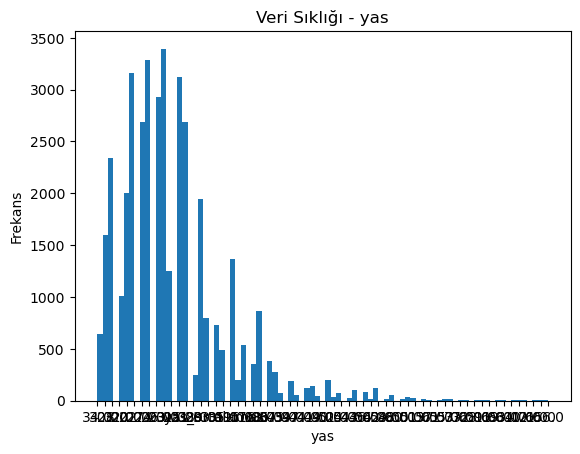

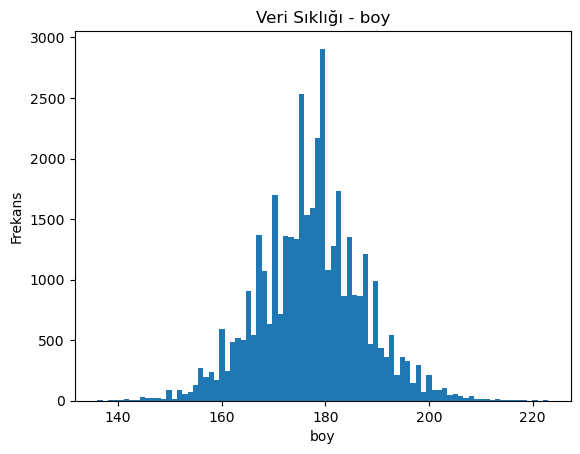

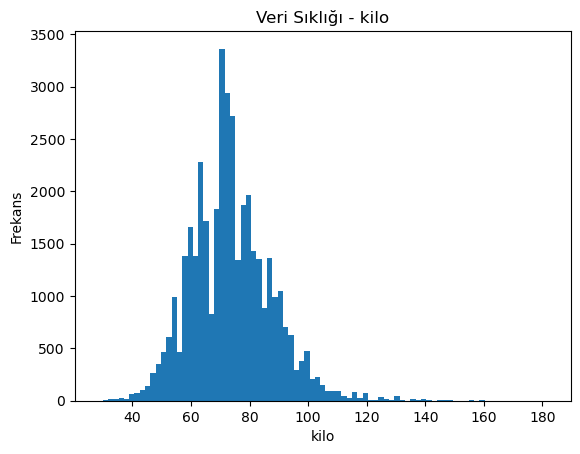

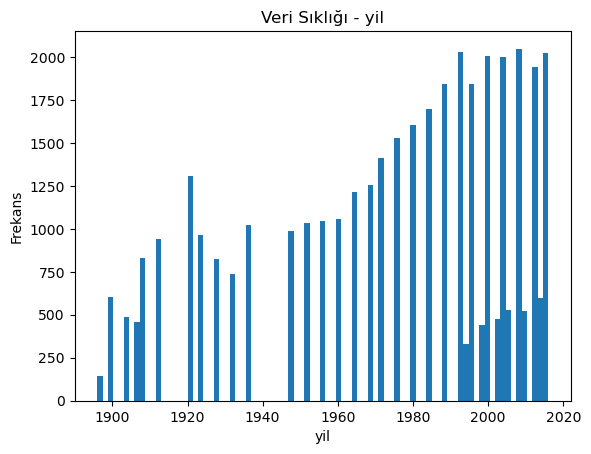

In [19]:
#tüm sayısal değişkenler için histogramları çizdirelim
sayısal_degisken = ["yas","boy","kilo","yil"]
for i in sayısal_degisken:
    plotHistogram(i)
    


BEKLENİLDİĞİ GİBİ, yaş, kilo boy kolonları normal dağılıma yakındır.
Yıl kolonu ise ilk göze çarpan son yüzyıllarda savaş zamanlarında olimp. o
olmadığı görünüyorç ve son 20 yılda eski yılalra göre daha cok yapıldığı

In [20]:
data 

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
39779,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
39780,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
39781,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


[]

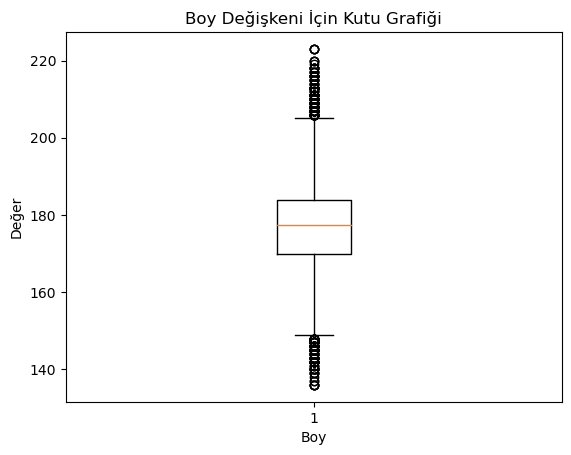

In [21]:
plt.boxplot(data.boy)
plt.title("Boy Değişkeni İçin Kutu Grafiği")
plt.xlabel("Boy")
plt.ylabel("Değer")
plt.plot()

In [22]:
def plotBar(degisken,n=5):
    
    '''
        Girdi: Değişken/sütun ismi
               n= gösterilecek eşsiz değer sayısı(
                  hepsini göstermek istemediğimiz için sınırladık)
        Çıktı: Çubuk grafiği
    '''
    data_ = data[degisken]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]
    plt.figure()
    plt.bar(data_counts.index, data_counts, color = "orange" )
    plt.xticks(data_counts.index, data_counts.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("frekans")
    plt.title("veri sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken,data_counts))

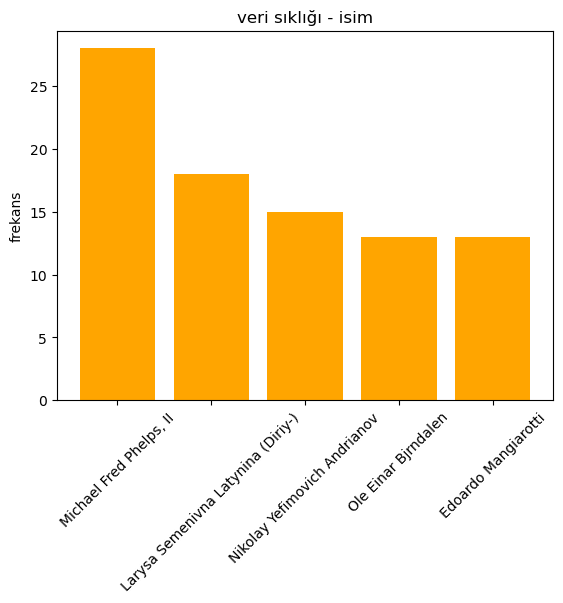

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


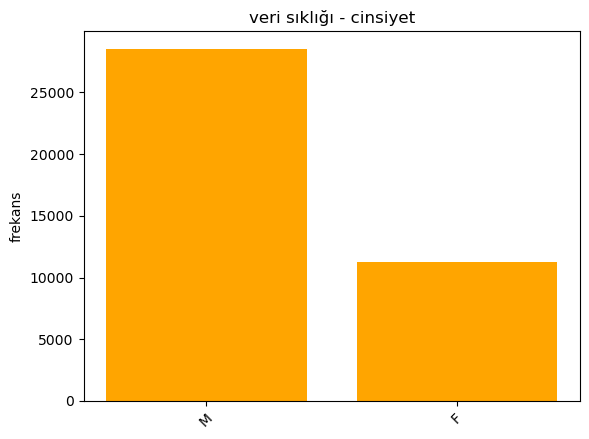

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


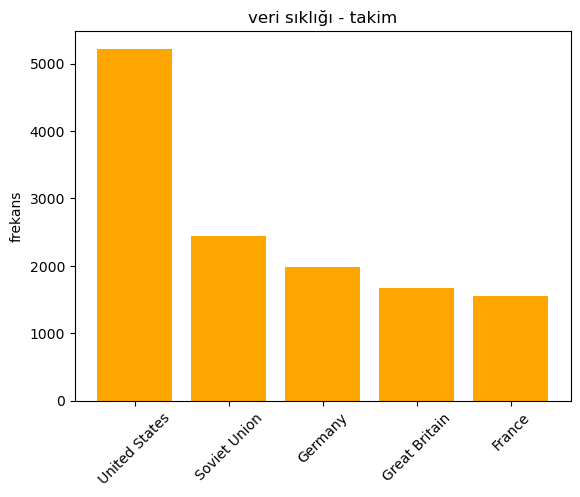

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


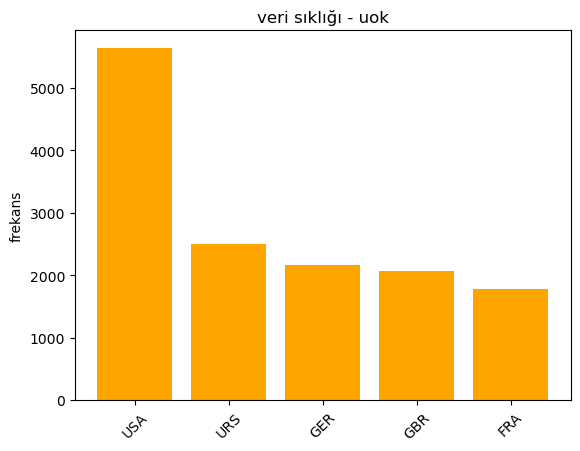

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


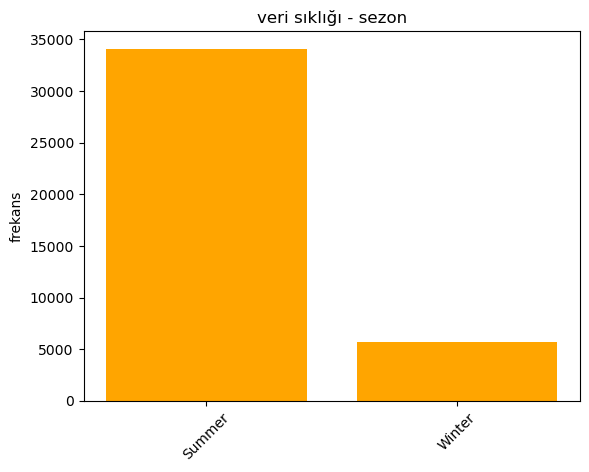

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


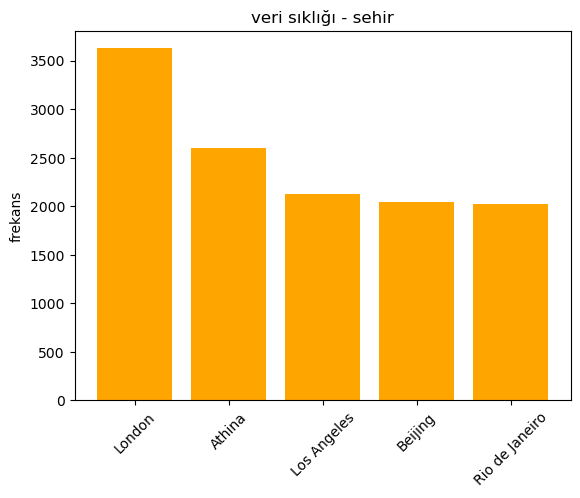

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


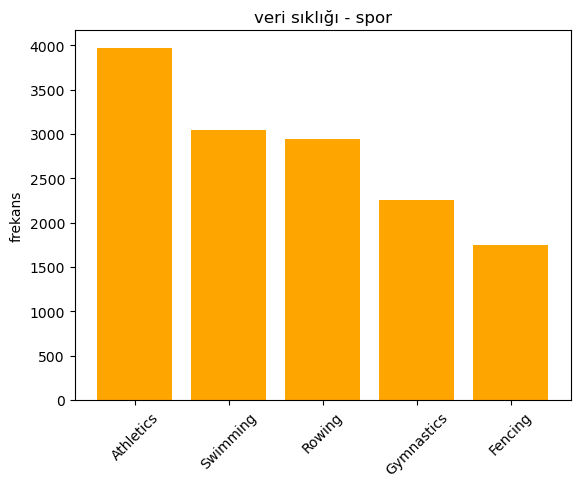

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


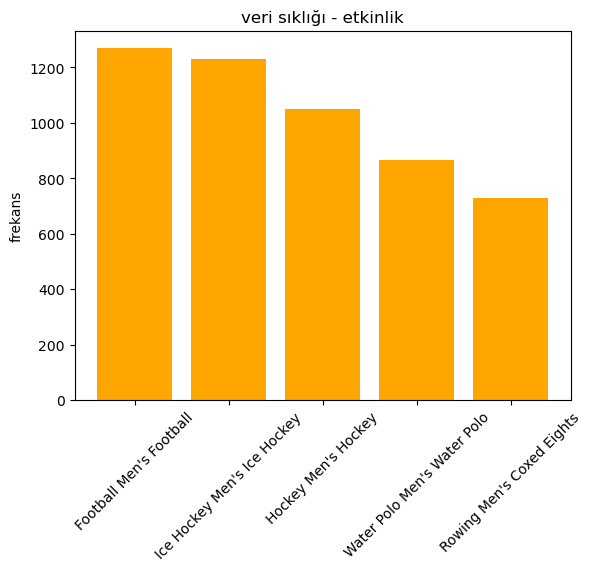

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


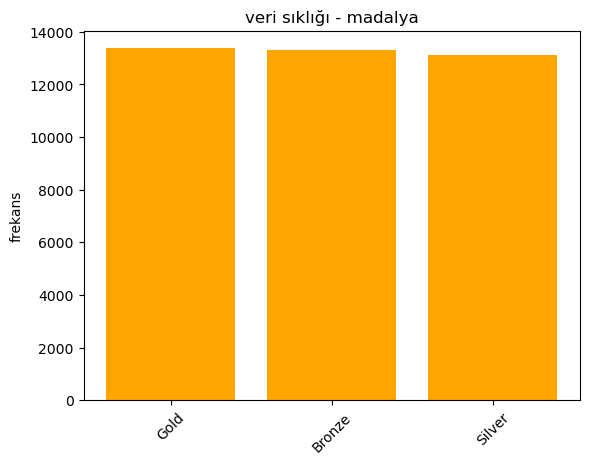

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [23]:
kategorik_degisken = ["isim","cinsiyet","takim","uok","sezon","sehir","spor","etkinlik","madalya"]
for i in kategorik_degisken:
    plotBar(i)

GRAFİK ANALİZLERİ.. 
1. Olimpiyat tarihinde en çok madalya kazanan isim Micheal Phelps dir.
2. Kadın ve erkek yarışmacılar arasında yaklaşık 1:2 oranı görülmektedir.
3. Takımlar olarak en çok ABD katılmıştır.
4. Beklendiği gibi uok ve takım çıktıları aynıdır. 
5. Yaz sezonunda düzenlenen olimpiyatlar sayısı kıştan fazladır.
6. Olimpiyatlar en fazla Londra da düzenlenmiştir. 
7. Olimpiyatlarda en çok atletizm branşında yarışılmıştır.
8. Erkekler futbol müsabakları en çokm yapılan etkinliktir.
9. Verilen madalyaların aynı çıkması beklenirken, farklılık vardır. 


# İki Değişkenli Veri Analizi


İki değişkenli veri analizi yaparken kazanılan madalyalar ve diğer sütunlar arasında bulunan ilişkileri inceleyeceğiz.
1. Cinsiyete göre boy ve kilo karşılaştırması
2. Sayısal sütunlar arasında ilişkinin incelenmesi
3. Madalya ve yaş arasındaki ilişkinin incelenmesi
4. Takımların kazandıkları altın, gümüş ve bronz madalya sayıları
5. Kazanılan madalyaların hangi şehirlerde kazanıldığı
6. Cinsiyete göre kazanılan altın, gümüş ve bronz madalya sayıları

• Görselleştirme bölümünde farklı görselleştirme teknikleri kullanılarak veri analizine devam edilecektir.

## Cinsiyete Göre Boy ve Ağırlık Karşılaştırılması

In [24]:
man = data[data["cinsiyet"] == "M" ]
man.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
5,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
6,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
7,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
8,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,FIN,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
9,Kjetil Andr Aamodt,M,20.0,176.00,85.00,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [25]:
woman = data[data["cinsiyet"] == "F" ]
woman.head(10)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
17,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
29,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
30,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
40,Tamila Rashidovna Abasova,F,21.0,163.00,60.00,Russia,RUS,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver
57,Margaret Ives Abbott (-Dunne),F,23.0,168.73,63.44,United States,USA,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
58,Monica Cecilia Abbott,F,23.0,191.00,88.00,United States,USA,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
59,Nia Nicole Abdallah,F,20.0,175.00,56.00,United States,USA,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver
61,Reema Abdo,F,21.0,173.00,59.00,Canada,CAN,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze


In [26]:
def plotScatter(degisken):
    
    """
    Bir saçılım grafiği ile 2 değişken arası korelasyona bakılır.
    
    """
    plt.figure()
    plt.scatter(degisken.boy,degisken.kilo,alpha = 0.4, label= degisken, color="orange")
    plt.xlabel("Boy")
    plt.ylabel("Kilo")
    plt.title("Boy ve Kilo Arasındaki İlişki")
    plt.show()

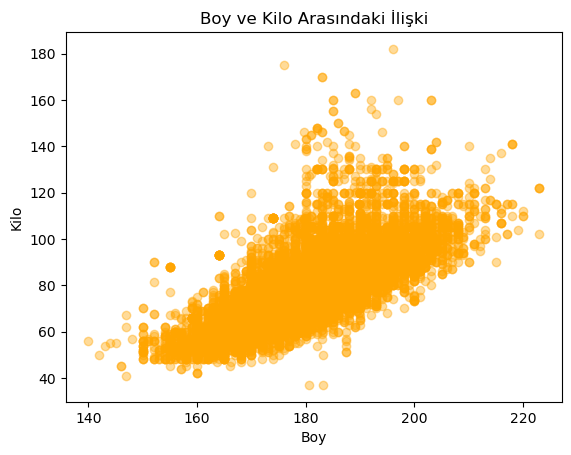

In [27]:
plotScatter(man)

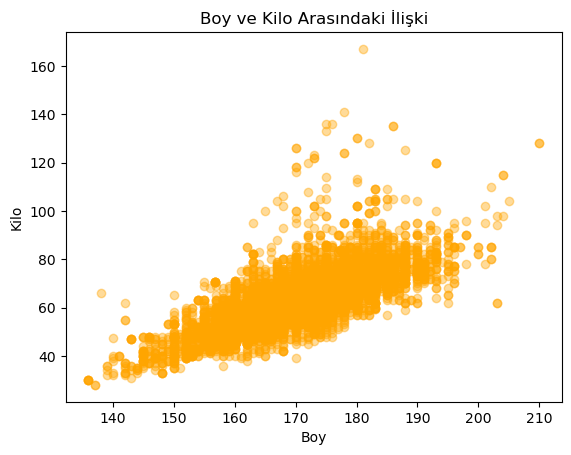

In [28]:
plotScatter(woman)

Görüldüğü gibi boy kilo arasında pozitif bir ilişki vardır. 

## Sayısal Sütünlar arası İLİŞKİ inceleme

### BOY - KİLO ARASI 

In [29]:
data.loc[:,["boy","kilo"]].corr()  #korelasyon tablosu
#loc locationdan gelir tüm satırlar:belli sütünlar 

,boy,kilo
boy,1.000000,0.794368
kilo,0.794368,1.000000


#### MADALYA - YAŞ

In [30]:
#sayısal ve sözel(kategorik) veriyi karşılaştıramayız.
#bu yüzden get_dummies ile sayısala dönüşüm yapıyoruz
## coding yapıyoruzzzzz
#sporcuları madalyalarına göre ayıralım
data_temp =data.copy()
data_temp =pd.get_dummies(data_temp,columns=["madalya"])
data_temp.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [31]:
data_temp.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()


,madalya_Bronze,madalya_Gold,madalya_Silver
madalya_Bronze,1.000000,-0.504110,-0.496859
madalya_Gold,-0.504110,1.000000,-0.499022
madalya_Silver,-0.496859,-0.499022,1.000000


### Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları

In [32]:
data_temp[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index=False).sum().sort_values(by= "madalya_Gold",ascending=False)[:10]
# .groupby("x")                         ---- x bazında grupla
# .sum()                                ---- gruptaki toplam sayıyı hesapla
# .sort_values(by="a",ascending=False ) ---- a'ya göre,azalan şekilde sırala
# [:10]   

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


### Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [33]:
data_temp[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index=False).sum().sort_values(by= "madalya_Gold",ascending=False)[:10]


,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


### Cinsiyete Göre Kazanılan Madalyalar


In [34]:
data_temp[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by= "madalya_Gold",ascending=False)


,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


# Çok Değişkenli Veri Analizi

# Pivot Tablosu

Pivot tablo, DB, iş zekası programı ya da veri tablosu gibi geniş bir tabloyu özetleyen istatistik tablosudur.


In [35]:
data_pivot = data.pivot_table(index= "madalya",columns="cinsiyet",
                             values = ["boy","kilo"],
                             aggfunc= {"boy":np.mean,"kilo":np.mean})
data_pivot.head(5)

boy                   kilo           
cinsiyet           F           M          F          M
madalya                                               
Bronze    170.003227  180.045806  62.757125  77.841504
Gold      170.448727  180.318906  63.199349  78.186505
Silver    170.233783  180.053626  62.866892  77.960887

# Anomali Tespiti
Aykırı değerlerin bulunmasıda, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneyesel hatayı gösterebilir. İkincisi bazen veri kümesinden çıkarılır.
Bir outlier değer istatistiksel analizlerde ciddi sorunlara yol açabilir.

In [36]:
def anomaliTespiti(df,ozellik):
    outlier_indices=[]
    
    for c in ozellik:
        #1.çeyrek
        Q1 = np.percentile(df[c],25)
        #3.çeyrek
        Q3 = np.percentile(df[c],75)
        #IQR = Inter Qurtile Range
        IQR = Q3 - Q1
        #aykırı değerler için ek adım miktarı
        outlier_step =1.5*IQR
        #aykırı değeri ve bulunduğu indeksi tespit edelim
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]>Q3 + outlier_step) ].index
        #tespit edilen indeksleri depolayalım
        outlier_indices.extend(outlier_list_col)
        
    #eşsiz aykırı değerleri bulalım
    outlier_indices = Counter(outlier_indices)
    #eğer bir örnek v adet sütunda farklı değer ise bunu aykırı kabul edelim
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>1)
    
    return multiple_outliers

In [37]:
veri_anomali = data.loc[anomaliTespiti(data,["kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Diving             3
Athletics          2
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

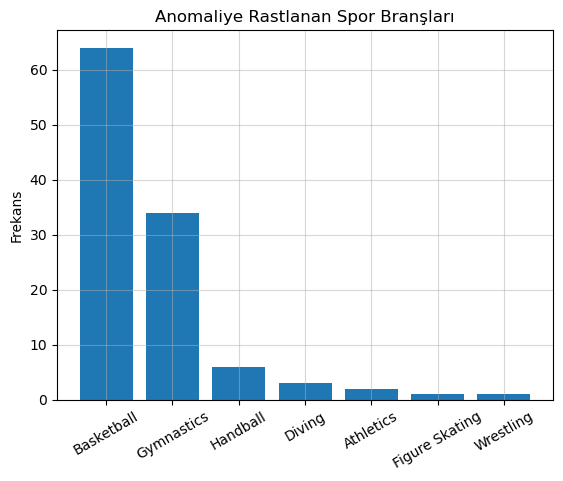

In [38]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.ylabel("Frekans")
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.grid(True,alpha=0.5)
plt.show()

In [39]:
veri_gym = veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1736,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
2802,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
3187,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
6486,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
7311,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
7312,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
9561,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
9562,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
9563,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
11245,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


Jimnastikte meydana gelen anomali-outlier incelediğimizde sporcuların yaşı küçük ve kilolarının az olmasındandır.
Ayrıca jimnastikte meydana gelen outlier hepsi kadın sporculardandır. 

In [40]:
veri_basketbol = veri_anomali[veri_anomali.spor=="Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1086,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
1087,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
2848,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
2849,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
3465,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
39645,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
39646,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
39736,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [41]:
veri_basketbol.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

Basketbol oynayan erkek oyuncuların boylarının uzun ve kilolarının fazla olmasında kaynaklı anomali tespit edilmiştir

# Zaman Serilerinde Veri Analizi


1. Yıllara göre ortalama Yaş, Boy ve Kilo Değişimi
2. Yıllara göre madalya sayıları

In [42]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [43]:
essiz_yillar = veri_zaman.yil.unique()#olimp. yapıldığı yılları görüyoruz
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [44]:
#olimpiyatların yapıldığı yılları sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

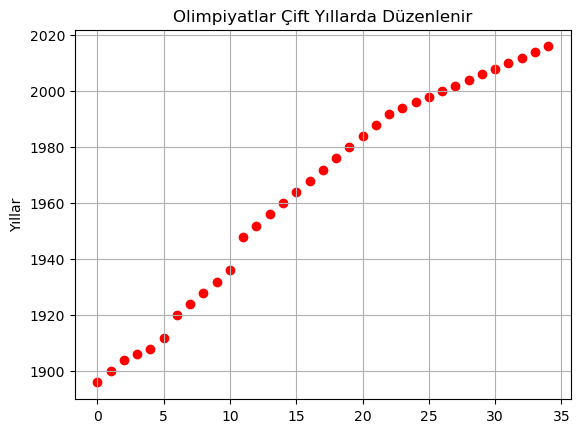

In [45]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array, color="red")
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [46]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürelim
tarih_saat_nesnesi= pd.to_datetime(veri_zaman["yil"],format="%Y")
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [47]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [48]:
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace= True)
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


### Yıllara Göre Ortalama Yaş ,Boy ve Kilo Değişimi


In [49]:
periyodik_veri = veri_zaman.resample("2A").mean()  #2 yıllık periyodlar halinde ortalama değerler
periyodik_veri.head()

,boy,kilo
tarih_saat,,
1896-12-31,174.280350,72.734056
1898-12-31,NaN,NaN
1900-12-31,177.882301,74.979950
1902-12-31,NaN,NaN
1904-12-31,177.241091,74.330823


In [50]:
#kayıp verileri çıkaralım
periyodik_veri.dropna(axis=0, inplace=True)
periyodik_veri.head()

,boy,kilo
tarih_saat,,
1896-12-31,174.280350,72.734056
1900-12-31,177.882301,74.979950
1904-12-31,177.241091,74.330823
1906-12-31,176.347576,74.072183
1908-12-31,176.662419,73.721107


<Figure size 640x480 with 0 Axes>

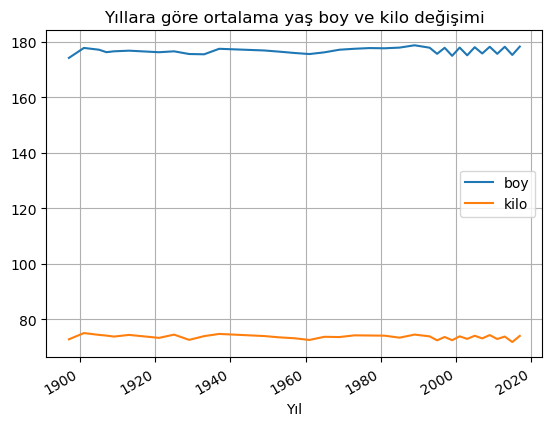

In [51]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş boy ve kilo değişimi")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

### Yıllara Göre Madalya Sayıları

In [52]:
veri_zaman = pd.get_dummies(veri_zaman,columns=["madalya"])
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [56]:
periyodik_veri = veri_zaman.resample("2A").sum()

#kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri==0).any(axis=1)]
periyodik_veri.tail()

,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,
2008-12-31,365157.91,152090.92,710,671,667
2010-12-31,91395.00,37877.12,171,174,175
2012-12-31,346091.47,143102.94,679,632,630
2014-12-31,104686.00,42838.63,198,202,197
2016-12-31,360846.03,149628.71,703,665,655


<Figure size 640x480 with 0 Axes>

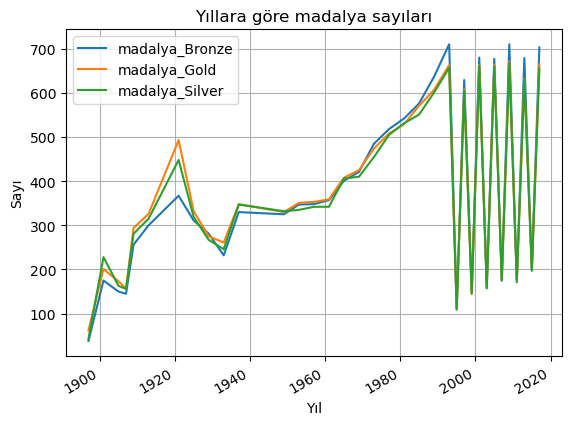

In [58]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

Yukarıda görüldüğü gibi 2000 li yıllardan sonra madalya sayılarındaki dalgalanmalar fazla oluyor.
Bu nedenle yaz ve kış olimpiyatlarında yapılan etkinlik sayısının ve
buna karşılık gelen madalya sayısının farklılık göstermektedir.

### Yıllara ve Sezonlara Göre Madalya Sayıları


In [60]:
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [61]:
periyodik_veri_kis = kis.resample("A").sum()
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()
# NAN değerler çıkarılmış oldu

,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,
1924-12-31,22867.28,9703.58,37,55,38
1928-12-31,15745.75,6862.50,31,30,28
1932-12-31,16357.71,7067.76,28,32,32
1936-12-31,19123.20,8101.88,35,36,37
1948-12-31,23942.51,10375.92,46,41,48


In [62]:
periyodik_veri_yaz = yaz.resample("A").sum()
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,
1896-12-31,24922.09,10400.97,38,62,43
1900-12-31,107440.91,45287.89,175,201,228
1904-12-31,86139.17,36124.78,150,173,163
1906-12-31,80767.19,33925.06,145,157,156
1908-12-31,146806.47,61262.24,256,294,281


<Figure size 640x480 with 0 Axes>

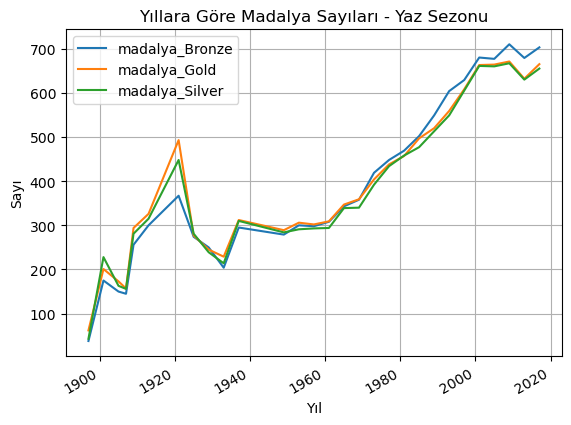

<Figure size 640x480 with 0 Axes>

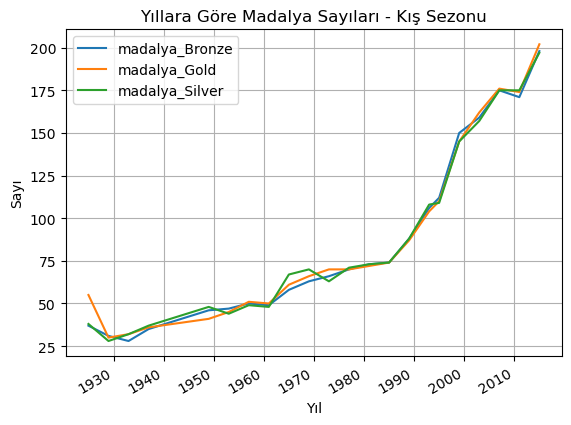

In [63]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot()  #zaman serisi olduğu için plot kullanıyoruz
plt.title("Yıllara Göre Madalya Sayıları - Yaz Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze","madalya_Gold","madalya_Silver"]].plot() 
plt.title("Yıllara Göre Madalya Sayıları - Kış Sezonu")
plt.ylabel("Sayı")
plt.xlabel("Yıl")
plt.grid(True)
plt.show()

# SONUÇ 
--------------------------------------------------------
## ***** VERİ BİLİMİ  *****
-------------------------------------

### ÖZET:
    
1. 15 TANE KOLON VARDI. HEPSİNİ ALDIK PANDASLA DATAFRAME İLE BAKABİLİRİZ.
2. KEŞİFSEL ANALİZDE, COMMA İLE AYRILANLARI İLK ÖNCE EXCEL FORMATTA İNCELEMEK DAHA MANTIKLI AYARLARINI YAPIP CSV2EXCEL
3. EXCELDE FİLTER MANTIKLI GÖRMEK !!! HER BİR KOLON İÇİN SORT EDİLEBİLİR BAKILIP
4. TÜRKÇE KARAKTERLERE DİKKAT EDİLMELİ
5. ŞİMDİ PYTHON TARAFINA DÖNÜP, VERİ HAKKINDA INFO İLE BİLGİ EDİNDİK. (VERİ TİPİ VE NULL DURUMLARI..)
6. KOLON İSİMLERİNİ RENAME YAPTIK VE INPLACE TRUE İLE YERİNDE DEĞİŞTİRDİK.
7. DROP FONKSİYONU İLE KOLON KALDIRMA - REDUNDANT KOLON -->13 KOLON KALDI
8. KAYIP VERİ İLE NOT A NUMBER FONK. 
9. PANDAS DA KATEGORİK VERİLERİN UNIQUE FONK. İLE BAKILDI. 
10. TÜM ETKİNİKLERİ DOLANIP ORTALAMASINI BULDUK VE CONDI. MEAN İLE NULLARI DOLDURDUK (ETKİNLİK ÖZELİNDE MEAN)
11. TÜM MEANLERİ DEĞİLDE ALT ÖZELLİKLERE GÖRE MEAN YAPTIK.
12. YAŞI BOŞ OLANLAR HERKESLE YAPTIK MEANİ ASLINDA COND. MEAN YAPILABİLİRDİ.
13. SATIR SUTUN ORTALAMA PANDAS LİB KULLANILIR.
14. NUMPY DA LİSTE İSTATİSTİKLERİNDE DAHA ÇOK KULLANILIR.
15. VERİ MÜHENDİSLİĞİ BURAYA KADARDI.
16. MADALYA ALAMAYANLARI ÇIKARDIK VERİ SETİNDEN.
17. VERİYE INFO İLE TEKRAR BAKILDI.
18. TEK DEĞİŞKENLİ VERİ ANALİZİ SAYISAL VE KATEGORİK DEĞİŞKENLERE BAKILDI.
19. SAYISAL DEĞİŞKENLERDE YOĞUNLUKLARI VE DAĞILIMLARI ÇİZİLDİ. --> KUTU VE HIST GRAFİKLERİ İLE İNCELENDİ.
20. KATEGORİK DEĞİŞKENLERDE İSE ÇUBUK GRAFİĞİ İLE HANGİ DEĞİŞKENDEN KAÇ ADET(FREKANS) ÇIKTI GÖRMEK.
21. FIGURE NESNESİ VE İLGİLİ PLOT İLE X VE Y LABEL, TITLE SON OLARAK SHOW İLE GRAFİKLER OLUŞUYOR.
22. TÜM SAYISAL DEĞİŞKENLER İÇİN HİST. ÇİZİLİP YORUMLAR YAPILDI - ÇARPIKLIK ÖZELİNDE VS
23. KATEGORİK DEĞİŞKENLERDE ÇOK FAZLA DEĞİŞKEN/ATTR. VARSA EN FAZLA N=5 DİYEREK TADINDA BIRAKTIK.
24. ÇOK DEĞİŞKENLİ ANALİZLER YAPILDI. ÖZELLİKLE KOŞULLU İFADEYİ IF SIZ YAZABİLİRDİK PYTHON DA
25. SCATTER PLOTTA İLİŞKİLERE BAKTIK. 
26. SAYISAL DEĞİŞKENLER ARASI CORR. YAPILIR.
27. ÇOK DEĞİŞKENLİ ANALİZLER PIVOT TABLE ÖNEMLİ !!!
28. ANOMALİ TESPİTİ OUTLIER TESPİTİNE BAKILIR DENETİMLİ DENETİMSİZ HER BİRİNDE YAPILABİLİR.
29. BİRDEN FAZLA ÖZELLİĞE AİT OUTLIER OLANLARA BAKTIK.
30. ZAMAN SERİLERİNE BAKILDI - YATAY EKSENDE
31. SORT ETMELER UNIQUE --> NUMERIC VE ORDINAL CAT. LERİ 
32. YIL DEĞİŞKENİNİ DATETIME DÖNÜŞTÜRÜLDÜ. DAHA ANLAMLI İÇİN
33. ARTIK YIL INDEXLENDİ PIVOTU KULLANABİLMEK İÇİN VE YIL DROP EDİLDİ.
34. KAYIP VERİ CIKTI TEKRAR REVİZE SONRASI ONLARI DROP ETTİK. 


